# Importing data

In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\raghu\\Downloads\\archive (2)\\Health Insurance Lead Prediction Raw Data.csv")
df_backup=df
df_backup.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

# Preprocessing

In [3]:
df.Holding_Policy_Duration.unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [4]:
df['Holding_Policy_Duration']=df.Holding_Policy_Duration.replace('14+','14')

In [5]:
df.Holding_Policy_Duration.unique()

array(['14', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [6]:
df.Holding_Policy_Duration=df.Holding_Policy_Duration.astype('float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  float64
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(3), int64(6

In [8]:
df.duplicated().sum()

0

In [9]:
df1=df.iloc[:,[5,6,10,11,12,13]]

In [10]:
df1.corr()

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Upper_Age,1.000000,0.921392,0.141890,0.025257,0.792689,0.002772
Lower_Age,0.921392,1.000000,0.118028,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.141890,0.118028,1.000000,0.079678,0.121342,0.009297
Reco_Policy_Cat,0.025257,0.021163,0.079678,1.000000,0.060989,0.114321
Reco_Policy_Premium,0.792689,0.615739,0.121342,0.060989,1.000000,0.007943
Response,0.002772,-0.002099,0.009297,0.114321,0.007943,1.000000


In [11]:
df=df.drop(columns=['Lower_Age'],axis=1)  #if 2 col have more than 85% correlation they both give same information to ML alg

# Handling outliers

C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: >

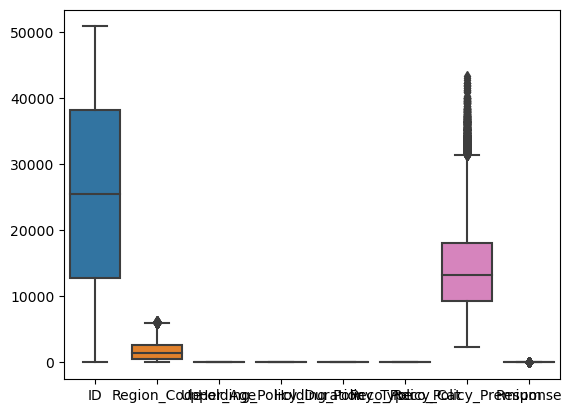

In [12]:
import seaborn as sn
sn.boxplot(df)

In [13]:
#Reco_Policy_Premium  Region_Code contains outliers so i remove outlier in Reco_Policy_Premium and retain Region_Code

In [14]:
#!pip install feature_engine
#from feature_engine.outliers  import Winsorizer 
#winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Reco_Policy_Premium'])
#df['Reco_Policy_Premium'] = winsorizer.fit_transform(df[['Reco_Policy_Premium']])

# col with zero variance does't have impact in data mining

In [15]:
df1.var()

Upper_Age              2.996455e+02
Lower_Age              2.999608e+02
Holding_Policy_Type    1.052518e+00
Reco_Policy_Cat        4.020400e+01
Reco_Policy_Premium    4.342909e+07
Response               1.823762e-01
dtype: float64

# handling null values

In [16]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  float64
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.0+ MB


In [18]:
 df['Health Indicator'].mode()

0    X1
Name: Health Indicator, dtype: object

In [19]:
import numpy as np
df['Health Indicator']=df['Health Indicator'].replace(np.nan,'X1')

In [20]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [21]:
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].replace(np.nan,df['Holding_Policy_Duration'].mode()[0])

In [22]:
df['Holding_Policy_Type']=df['Holding_Policy_Type'].replace(np.nan,df['Holding_Policy_Type'].mode()[0])

In [23]:
df.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

# Encoding

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         50882 non-null  object 
 8   Holding_Policy_Duration  50882 non-null  float64
 9   Holding_Policy_Type      50882 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.0+ MB


In [25]:
df['Accomodation_Type'].unique()

array(['Rented', 'Owned'], dtype=object)

In [26]:
df['Accomodation_Type']=df['Accomodation_Type'].replace(['Rented', 'Owned'],[0, 1])
df['Accomodation_Type']=df['Accomodation_Type'].astype('int64')

In [27]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,0,Individual,36,No,X1,14.0,3.0,22,11628.0,0
1,2,C5,1117,1,Joint,75,No,X2,14.0,3.0,22,30510.0,0
2,3,C5,3732,1,Individual,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,1,Joint,52,No,X1,14.0,3.0,19,17780.0,0
4,5,C8,2190,0,Individual,44,No,X2,3.0,1.0,16,10404.0,0


In [28]:
df['Reco_Insurance_Type'].unique()

array(['Individual', 'Joint'], dtype=object)

In [29]:
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].replace(['Individual', 'Joint'],[1, 0])
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].astype('int64')

In [30]:
df['Is_Spouse'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df['Is_Spouse']=df['Is_Spouse'].replace(['No', 'Yes'],[1,0])
df['Is_Spouse']=df['Is_Spouse'].astype('int64')

C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='Health Indicator', ylabel='count'>

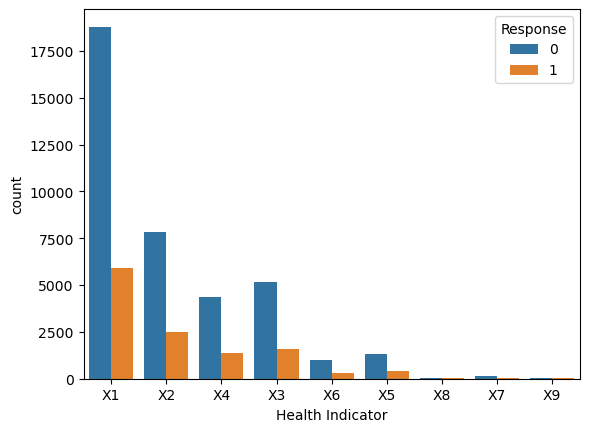

In [32]:
sn.countplot(x = 'Health Indicator', data = df, hue = 'Response')

In [33]:
df['Health Indicator'].unique()

array(['X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'], dtype=object)

In [34]:
df['Health Indicator']=df['Health Indicator'].replace(['X1','X2','X3','X4','X5','X6','X7','X8','X9'],[0,1,2,3,4,4,4,4,4])
df['Health Indicator']=df['Health Indicator'].astype('int64')

C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='City_Code', ylabel='count'>

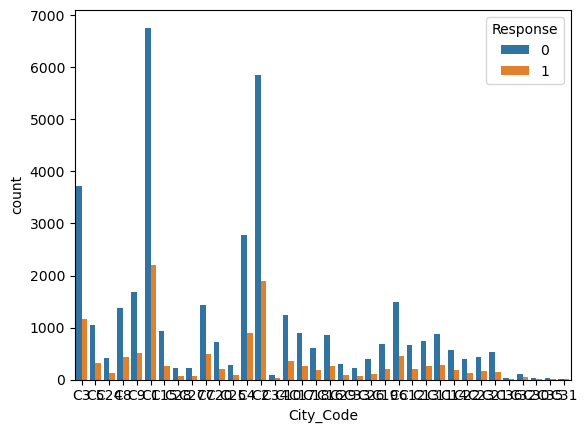

In [35]:
sn.countplot(x = 'City_Code', data = df, hue = 'Response')

In [36]:
df['City_Code'].replace(('C1','C2','C3','C4','C5','C6','C7','C8','C9','C10',
                           'C11','C12','C13','C14','C15','C16','C17','C18','C19','C20',
                           'C21','C22','C23','C24','C25','C26','C27','C28','C29','C30',
                           'C31','C32','C33','C34','C35','C36'), (0,0,0,1,1,1,1,1,1,1,
                                                            1,1,1,1,1,1,2,2,2,2,
                                                            2,2,2,2,2,2,2,2,2,2,
                                                            3,3,3,3,3,3), inplace = True)
df['Health Indicator']=df['Health Indicator'].astype('int64')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  int64  
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  int64  
 4   Reco_Insurance_Type      50882 non-null  int64  
 5   Upper_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  int64  
 7   Health Indicator         50882 non-null  int64  
 8   Holding_Policy_Duration  50882 non-null  float64
 9   Holding_Policy_Type      50882 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 5.0 MB


In [38]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,0,3213,0,1,36,1,0,14.0,3.0,22,11628.0,0
1,2,1,1117,1,0,75,1,1,14.0,3.0,22,30510.0,0
2,3,1,3732,1,1,32,1,0,1.0,1.0,19,7450.0,1
3,4,2,4378,1,0,52,1,0,14.0,3.0,19,17780.0,0
4,5,1,2190,0,1,44,1,1,3.0,1.0,16,10404.0,0


In [39]:
df_backup.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14.0,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'City_Code'}>,
        <Axes: title={'center': 'Region_Code'}>,
        <Axes: title={'center': 'Accomodation_Type'}>],
       [<Axes: title={'center': 'Reco_Insurance_Type'}>,
        <Axes: title={'center': 'Upper_Age'}>,
        <Axes: title={'center': 'Is_Spouse'}>,
        <Axes: title={'center': 'Health Indicator'}>],
       [<Axes: title={'center': 'Holding_Policy_Duration'}>,
        <Axes: title={'center': 'Holding_Policy_Type'}>,
        <Axes: title={'center': 'Reco_Policy_Cat'}>,
        <Axes: title={'center': 'Reco_Policy_Premium'}>],
       [<Axes: title={'center': 'Response'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

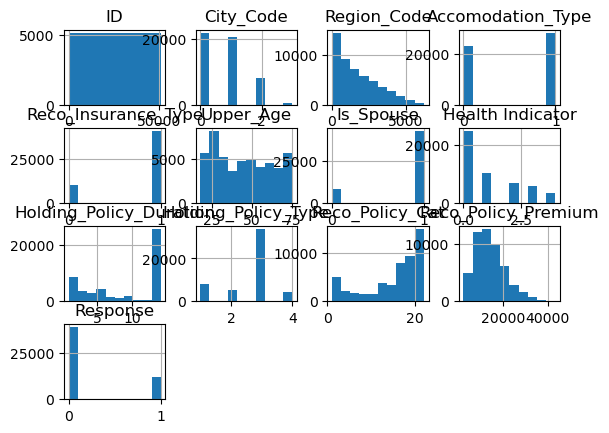

In [40]:
df.hist()

In [41]:
df=df.drop(columns=['ID'],axis=1)

# Data Transformation

In [42]:
df.Reco_Policy_Premium=np.log(df['Reco_Policy_Premium'])

array([[<Axes: title={'center': 'City_Code'}>,
        <Axes: title={'center': 'Region_Code'}>,
        <Axes: title={'center': 'Accomodation_Type'}>],
       [<Axes: title={'center': 'Reco_Insurance_Type'}>,
        <Axes: title={'center': 'Upper_Age'}>,
        <Axes: title={'center': 'Is_Spouse'}>],
       [<Axes: title={'center': 'Health Indicator'}>,
        <Axes: title={'center': 'Holding_Policy_Duration'}>,
        <Axes: title={'center': 'Holding_Policy_Type'}>],
       [<Axes: title={'center': 'Reco_Policy_Cat'}>,
        <Axes: title={'center': 'Reco_Policy_Premium'}>,
        <Axes: title={'center': 'Response'}>]], dtype=object)

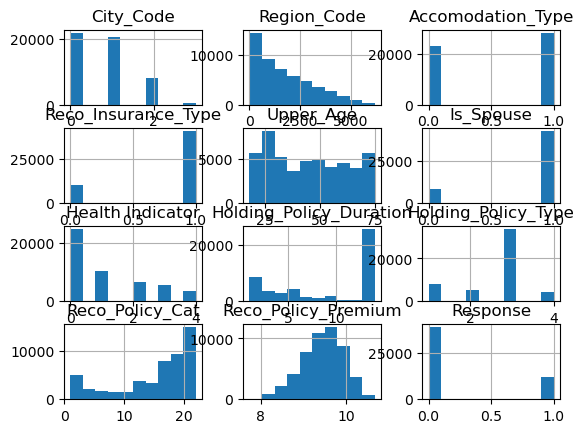

In [43]:
df.hist()

# Data Scaling

C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: >

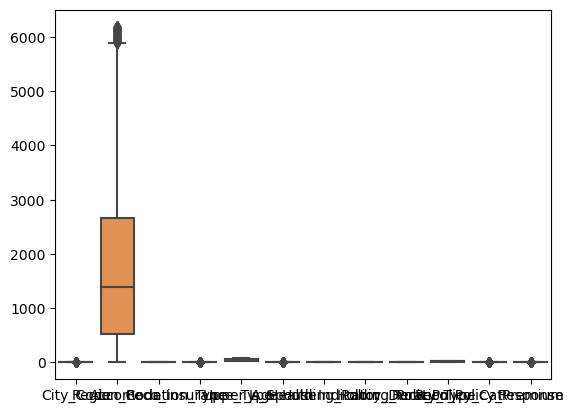

In [44]:
sn.boxplot(df)

In [45]:
df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,0,3213,0,1,36,1,0,14.0,3.0,22,9.361171,0
1,1,1117,1,0,75,1,1,14.0,3.0,22,10.325810,0
2,1,3732,1,1,32,1,0,1.0,1.0,19,8.915969,1
3,2,4378,1,0,52,1,0,14.0,3.0,19,9.785830,0
4,1,2190,0,1,44,1,1,3.0,1.0,16,9.249946,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,1,845,0,1,22,1,2,14.0,3.0,18,8.949495,0
50878,1,4188,0,1,27,1,2,7.0,3.0,4,8.595635,0
50879,0,442,0,1,63,1,1,14.0,1.0,12,9.339085,0
50880,0,4,1,0,71,1,1,2.0,2.0,16,10.246339,1


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


In [47]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [48]:
scaled_df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,0.000000,0.518650,0.0,1.0,0.315789,1.0,0.00,1.000000,0.666667,1.000000,0.553196,0.0
1,0.333333,0.180203,1.0,0.0,1.000000,1.0,0.25,1.000000,0.666667,1.000000,0.880732,0.0
2,0.333333,0.602454,1.0,1.0,0.245614,1.0,0.00,0.000000,0.000000,0.857143,0.402031,1.0
3,0.666667,0.706766,1.0,0.0,0.596491,1.0,0.00,1.000000,0.666667,0.857143,0.697386,0.0
4,0.333333,0.353464,0.0,1.0,0.456140,1.0,0.25,0.153846,0.000000,0.714286,0.515430,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,0.333333,0.136283,0.0,1.0,0.070175,1.0,0.50,1.000000,0.666667,0.809524,0.413415,0.0
50878,0.333333,0.676086,0.0,1.0,0.157895,1.0,0.50,0.461538,0.666667,0.142857,0.293264,0.0
50879,0.000000,0.071209,0.0,1.0,0.789474,1.0,0.25,1.000000,0.000000,0.523810,0.545697,0.0
50880,0.000000,0.000484,1.0,0.0,0.929825,1.0,0.25,0.076923,0.333333,0.714286,0.853748,1.0


C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: >

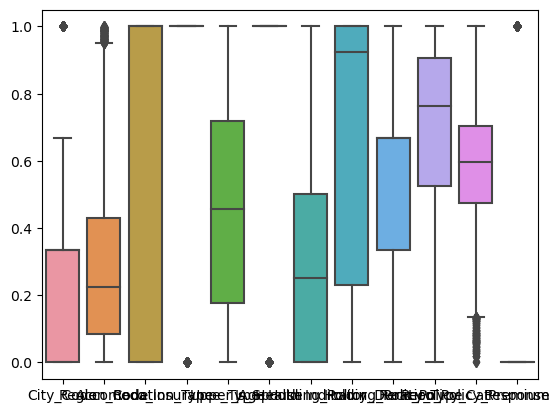

In [49]:
sn.boxplot(scaled_df)

array([[<Axes: title={'center': 'City_Code'}>,
        <Axes: title={'center': 'Region_Code'}>,
        <Axes: title={'center': 'Accomodation_Type'}>],
       [<Axes: title={'center': 'Reco_Insurance_Type'}>,
        <Axes: title={'center': 'Upper_Age'}>,
        <Axes: title={'center': 'Is_Spouse'}>],
       [<Axes: title={'center': 'Health Indicator'}>,
        <Axes: title={'center': 'Holding_Policy_Duration'}>,
        <Axes: title={'center': 'Holding_Policy_Type'}>],
       [<Axes: title={'center': 'Reco_Policy_Cat'}>,
        <Axes: title={'center': 'Reco_Policy_Premium'}>,
        <Axes: title={'center': 'Response'}>]], dtype=object)

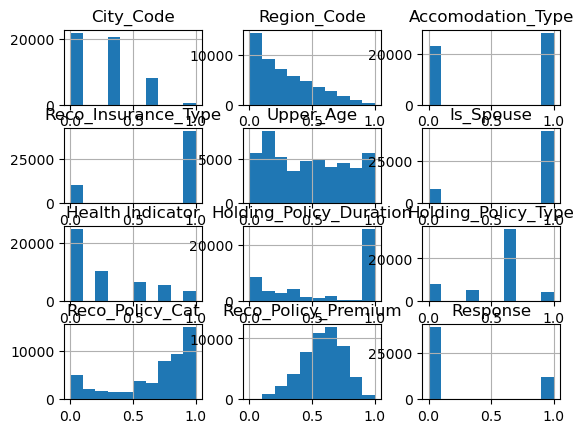

In [50]:
scaled_df.hist()

# model Building

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = scaled_df['Response']  # Target variable
X = scaled_df.drop(columns=['Response'])  # Features

In [52]:
y.value_counts()

Response
0.0    38673
1.0    12209
Name: count, dtype: int64

# Oversampling to balance the class(response col) which is imbalance

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

In [54]:
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_series = pd.Series(y_resampled, name=y.name)
print("Class distribution after oversampling:")
print(y_resampled_series.value_counts())

Class distribution after oversampling:
Response
0.0    38673
1.0    38673
Name: count, dtype: int64


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df,y_resampled_series, test_size=0.2, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


In [57]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7588235294117647


In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier
clf = KNeighborsClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


In [59]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.718164188752424


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


In [61]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8349062702003879
